In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# Part 1 (40 marks)

**Aim:** Show competence in using the `pandas` library, in particular when managing missing values. 

In the following you are asked to analyze a real world dataset. The data available here has been used in the following article: https://fivethirtyeight.com/features/how-americans-like-their-steak/

The data contains missing values and some entries need to be cleaned up.

In this exercise you will use the pandas library to create functions to help processing this dataset and extract some insight in the data.  

## Question 1.1 (2 marks)

Create a data frame `df` from the file 'steak-risk-survey_clean.csv' using `RespondentID` as index.

In [2]:
file_name = 'steak-risk-survey_clean.csv'

df = pd.read_csv(file_name)
df.set_index('RespondentID', inplace=True)

In [3]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.2 (2 marks)

Make a function `patch(df)` that takes in input the dataframe `df` created from the file 'steak-risk-survey_clean.csv', and returns a dataframe where for those people that have answered 'No' to the question 'Do you eat steak?' the entries in the column `How do you like your steak prepared?` are replaced with the value 'No'.

In [4]:
def patch(df):
    df2 = df.copy()
    df2.loc[df2['Do you eat steak?'] == 'No', 'How do you like your steak prepared?'] = 'No'
    return df2

In [5]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.3 (5 marks)

Make a function `remove_rows_with_excess_of_missing(df, cutoff)` that returns a data frame where the rows with a number greater or equal to `cutoff` missing values have been removed.

In [52]:
def remove_rows_with_excess_of_missing(df, cutoff):
    df2 = df.copy()
    df2 = df2[df2.isnull().sum(axis=1) < cutoff]
    return df2

In [53]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.4 (4 marks)

Make a function `select_rows_with_missing(df)` to extract the dataframe's rows that contain missing values. 

In [54]:
def select_rows_with_missing(df):
    df2 = df[df.isnull().any(axis=1)]
    return(df2)

In [55]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.5 (5 marks)

Make a function `replace_content(df, col, to_be_replaced, replacement)` to replace the occurrence of the string `to_be_replaced` with the string `replacement` for all rows in a specified column `col`.

Use the function to replace `&gt; 60` with `60+` in column `Age`, and `Lottery A` with `risk yes` and `Lottery B` with `risk no` in column `Lottery Type`.

*Note: Search the documentation of the pandas library to find how to replace text.*

In [65]:
def replace_content(df, col, to_be_replaced, replacement):
    df2 = df.replace({col: to_be_replaced}, {col: replacement})
    return df2
    
# perform here the replacements as instructed in the Question text   
file_name = 'steak-risk-survey_clean.csv'
df = pd.read_csv(file_name)
df.set_index('RespondentID', inplace=True)

df = replace_content(df, 'Age', '&gt; 60', '60+')
df = replace_content(df, 'Lottery Type', 'Lottery A', 'risk yes')
df = replace_content(df, 'Lottery Type', 'Lottery B', 'risk no')

In [57]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.6 (4 marks)

Make a function `find_k_most_similar(df, record_id, k)` that takes in input a dataframe `df`, the label of a row `record_id` and a parameter `k` and returns a dataframe that contains the k rows in `df` that have the largest number of entries in common (i.e. that match exactly) with the record with index `record_id` (this should include also the instance with label `record_id`). 

In [58]:
def find_k_most_similar(df, record_id, k):
    a = df.loc[record_id]
    df2 = df[(df==a)].count(axis=1)
    common_rows = df2.nlargest(k).index
    df3 = df.loc[common_rows]
    return df3

In [59]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.7 (8 marks)

Make a function `replace_missing(df, k)` that takes in input a data frame `df` and a parameter `k` and returns a dataframe where the missing elements in `df` have been replaced by the corresponding element in the k most similar records that appears most often. 

You may use of the functions you have previously defined. 

In [60]:
def replace_missing(df, k):
    df1 = df.copy()
    for ind, row in df1.iterrows(): # Here we iterate over the each row and index of df1
        df1.loc[ind] = df1.loc[ind].fillna(find_k_most_similar(df1, ind, k).mode().loc[0])
    return df1

In [61]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.8 (9 marks)

Make a function `select(df, col1, col2)` that takes a data frame and two column labels and outputs a multi indexed Series with the fraction of occurrences of possible values of `col2` given the values of `col1`. 

For example `select(df_test, 'Do you ever gamble?', 'Lottery Type')` would yield
```
Do you ever gamble?  Lottery Type:
No                   risk yes        0.433099
                     risk no         0.566901
Yes                  risk yes        0.548872
                     risk no         0.451128
```
Note that the sum of Lottery Type:risk yes + Lottery Type:risk no is 1.0.

In [66]:
def select(df, col1, col2):
    grouped = df.groupby([col1, col2])
    dfg = grouped.count().astype(float)
    dfg = dfg.sum(axis=1)
    tot01 = dfg[0]+dfg[1]
    dfg[0] = dfg[0]/tot01
    dfg[1] = dfg[1]/tot01
    tot23 = dfg[2]+dfg[3]
    dfg[2] = dfg[2]/tot23
    dfg[3] = dfg[3]/tot23
    dfg
    return dfg

In [39]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [40]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.9 (1 mark)

Make a function `plot_selection(df, col1, col2)` that plots the output of `select(df, col1, col2)` like this:

<img src='plot_selection.png' width="300">

In [67]:
def plot_selection(df, col1, col2):
    dfg = select(df, col1, col2)
    dfg.plot(kind='bar', subplots=False)
    return plt.show()

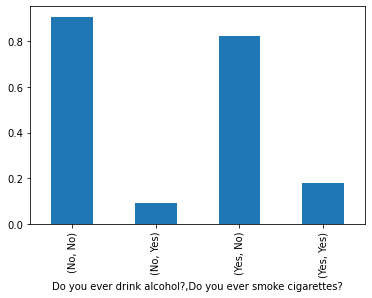

In [72]:
# create a data frame from the file steak-risk-survey_clean.csv and run your plot_selection function 
# on the columns 'Do you ever drink alcohol?' and 'Do you ever smoke cigarettes?'

df = pd.read_csv('steak-risk-survey_clean.csv')
plot_selection(df,'Do you ever drink alcohol?','Do you ever smoke cigarettes?')

# Part 2 (30 marks)

**Aim:** Show competence in using the `numpy` library, in particular when managing two dimensional arrays.

This exercise is based on the famous "Conway game". The game takes place on a two-dimensional grid consisting of "living" and "dead" cells, and the rules to step from generation to generation are as follows:

- **Overpopulation:** if a living cell is surrounded by more than three living cells, it dies.
- **Stasis:** if a living cell is surrounded by two or three living cells, it survives.
- **Underpopulation:** if a living cell is surrounded by fewer than two living cells, it dies.
- **Reproduction:** if a dead cell is surrounded by exactly three cells, it becomes a live cell.

In this exercise you are asked to implement the two-dimensional grid using a numpy two dimensional array and to implement the necessary functions to execute the rules of the game. 

**Note:**

The notion of the game boundaries requires extra attention. There are two possibilities:
1. the boundaries are "hard" and cannot be traversed
2. the boundaries are "wrapped" and can be traversed 

In the "wrapped" case we can have:
1. both left-right and top-bottom are wrapped (toroidal geometry)
2. only one of the axis is wrapped and the other is not (cylindrical geometry)

In this exercise, for semplicity, you are asked to implement a cylindrical geometry, specifically the grid wraps from left to right but not from top to bottom.

The meaning of being "wrapped" is as follows: suppose you have a 5 by 5 grid, suppose we are wrapping axis 1, then moving left to right means increasing the index along axis 1. Consider the first row, cell (0,0) is at the top left corner of the grid, cell (0,4) is at the top right of the grid, cell (0,5) is at the same position of cell (0,0) as we have wrapped axis 1, cell (0,6) is at the same position of cell (0,1), etc. 

<img src="wrap.png" width=300>

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors
import math

## Question 2.1 (5 marks)

Make a function `plot_list(Xs, n_per_row)` that takes in input a list of numpy 2-dimensional arrays and a parameter `n_per_row` to set the number of elements display in a single row. 

The output associated to the following list of 4 arrays should be as indicated in the figure below.

```
Xs =[
[[1 0 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
,
[[0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]]
,
[[0 0 1 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
,
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 1]]
]
```
`plot_list(Xs, n_per_row=2)`
<img src="plot.png" width=300>

In [7]:
def plot_list(Xs, n_per_row=5):
    num_plots = len(Xs)
    n_per_column = math.ceil(num_plots/n_per_row)
    f = plt.figure(figsize=(3*n_per_row,3*n_per_column))
    for i in range(0,num_plots):
        plt.subplot(n_per_column,n_per_row,i+1)
        plt.pcolor(Xs[i][::-1],cmap='binary',edgecolors='lightgrey', linewidths=2)
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
    return plt.show()

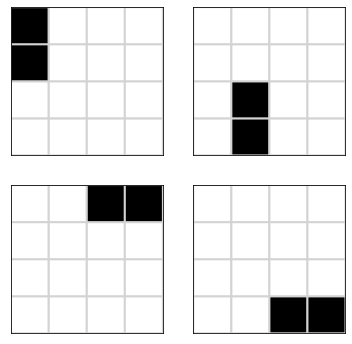

In [76]:
# Create the list of grids data Xs as instructed in the Question text.
Xs =[[[1,0,0,0],
      [1,0,0,0],
      [0,0,0,0],
      [0,0,0,0]],
     [[0,0,0,0],
      [0,0,0,0],
      [0,1,0,0],
      [0,1,0,0]],
     [[0,0,1,1],
      [0,0,0,0],
      [0,0,0,0],
      [0,0,0,0]],
     [[0,0,0,0],
      [0,0,0,0],
      [0,0,0,0],
      [0,0,1,1]]]

# leave the following function call as it is, as its output is going to be judged in the evaluation
plot_list(Xs, n_per_row=2)

## Question 2.2 (6 marks)

Make a function `make_initial_configuration(nrows, ncols, border_width, sparsity)` to generate an initial random grid. The function takes in input the number of rows `nrows`, the number of columns `ncols`, the number of cells from the border where it is guaranteed that no 'alive' cell will be placed, and a real value between 0 and 1 `sparsity` that indicates the fraction of cells that are not alive. This fraction does not need to be exact but should be approximately correct, i.e. a few alive cells more or less are tolerated, but if sparsity is 0.9 it is expected that most of the cells will be not alive.

For a 10x10 grid, with border=2 and sparsity values of 0.1, 0.5, 0.7, 0.9 you should get something like this:

<img src="sparse.png" width=300>

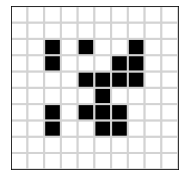

In [121]:
def make_initial_configuration(nrows=40, ncols=40, border_width=10, sparsity=0.8):
    A = np.array(np.random.choice(np.arange(2), p=[sparsity,1-sparsity], size=(nrows,ncols)))
    if border_width == 0:
        A = A
    else:
        A[0:border_width] = '0'
        A[-border_width:] = '0'
        A[:,0:border_width] = '0'
        A[:,-border_width:] = '0'
    f = plt.figure(figsize=(3,3))
    plt.pcolor(A[::-1],cmap='binary',edgecolors='lightgrey', linewidths=2)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return plt.show()

make_initial_configuration(nrows=10, ncols=10, border_width=2, sparsity=0.5)

In [48]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.3 (8 marks)

Make a function `extract(X, i, j, s)` that extracts a neighborhood sub-array of `X` with center `i,j` and radius `s`. The function should wrap around axis 1. 
To understand what a neighborhood sub-array of `X` with center `i,j` and radius `s` is, consider the following example: 

given the array X
```
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
```
when you apply `extract(X,2,4,s=1)` you should obtain:
```
[[ 8  9  5]
 [13 14 10]
 [18 19 15]]
```
when you apply `extract(X,2,0,s=1)` you should obtain:
```
[[ 9  5  6]
 [14 10 11]
 [19 15 16]]
```
The function should be efficient and work for any value of `s`. If the neighborhood sub-array does not fit in the grid even when considering wrapping around axis 1, then you should raise an error. 

In [122]:
def extract(X,i,j,s=1):
    if i-s<0 or i+(s+1)>len(X):
        neighbourhood = 'error'
    else:
        indicesi = range(i-s,i+(s+1))
        indicesj = range(j-s,j+(s+1))
        neighbourhood = X.take(indicesj,axis=1,mode='wrap').take(indicesi,axis=0)
    return neighbourhood

In [123]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [124]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [125]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.4 (7 marks)

Make a function `step(X)` that takes in input a grid with an initial configuration of alive cells and returns the grid with the new configuration after having applied the rules of the game:


- **Overpopulation:** if a living cell is surrounded by more than three living cells, it dies.
- **Stasis:** if a living cell is surrounded by two or three living cells, it survives.
- **Underpopulation:** if a living cell is surrounded by fewer than two living cells, it dies.
- **Reproduction:** if a dead cell is surrounded by exactly three cells, it becomes a live cell.

When you repeatedly apply `step` to the following initial configuration (called a "glider") 
```
[[0, 0, 0, 0],
[1, 0, 0, 0],
[0, 1, 1, 0],
[1, 1, 0, 0],
[0, 0, 0, 0]]
```
you should obtain the following result

<img src="glider.png" width=300>

In [137]:
# Auxiliary functions

def overpopulation(H):
    val = H[1,1]
    if val == 0:
        if H.sum() == 3:
            val = 1
    else:
        if H.sum() > 4:
            val = 0
        elif 3 <= H.sum() and H.sum() <= 4:
            pass
        elif H.sum() <= 2:
            val = 0
    return val
    
def extract_for_game(X,i,j,s=1):
    if i-s<0:
        indicesi = range(i,i+(s+1))
        indicesj = range(j-s,j+(s+1))
        neighbourhood = X.take(indicesj,axis=1,mode='wrap').take(indicesi,axis=0)
    elif i+(s+1)>len(X):
        indicesi = range(i-s,i+1)
        indicesj = range(j-s,j+(s+1))
        neighbourhood = X.take(indicesj,axis=1,mode='wrap').take(indicesi,axis=0)
    else:
        indicesi = range(i-s,i+(s+1))
        indicesj = range(j-s,j+(s+1))
        neighbourhood = X.take(indicesj,axis=1,mode='wrap').take(indicesi,axis=0)
    return neighbourhood

def make_initial_configuration_for_game(nrows=40, ncols=40, border_width=10, sparsity=0.8):
    A = np.array(np.random.choice(np.arange(2), p=[sparsity,1-sparsity], size=(nrows,ncols)))
    if border_width == 0:
        A = A
    else:
        A[0:border_width] = '0'
        A[-border_width:] = '0'
        A[:,0:border_width] = '0'
        A[:,-border_width:] = '0'
    return A

# Step function

def step(X):
    X = np.array(X)
    Z1 = X.copy()
    Z = np.array(Z1)
    L = []
    for i in range(0,len(X)):
        for j in range(0,len(X[0])):
            H = extract_for_game(Z1,i,j,1)
            end = overpopulation(H)
            Z[i][j] = end
            Z = Z.tolist()
            Z = np.array(Z)
    L.append(Z)
    L = np.array(L)
    return Z

In [138]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.5 (4 marks)

Make a function `conway_game(X, n_steps)` that applies the rules for the number of steps indicated in `n_steps` to the initial configuration `X` and returns the final configuration. The function should also plot the intermediate steps using the previously defined function `plot_list`, using a default of 5 grids per row.

In [155]:
def conway_game(X, n_steps):
    C = []
    for i in range(0,n_steps+1):
        C.append(X)
        new_X = step(X)
        X = new_X
    plot_list(C)
    return C[n_steps-1]

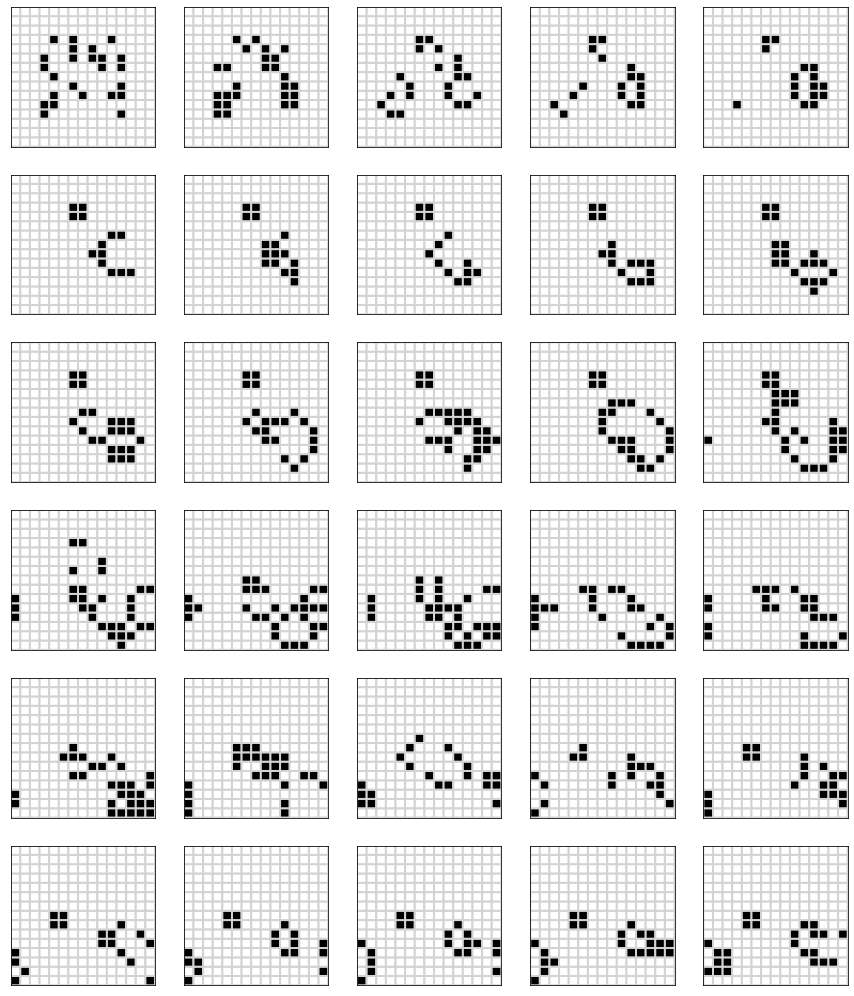

In [156]:
# Create an initial grid configuration X of size 15x15 with a border of 3 and a sparsity of 0.7

X = make_initial_configuration_for_game(nrows=15, ncols=15, border_width=3, sparsity=0.7)


# leave the following function call as it is, as its output is going to be judged in the evaluation
X = conway_game(X, n_steps=5*6-1)

# Part 3 (30 marks)

**Aim:** Show competence in using the `pandas` library when managing time series.

In this exercise you are asked to retrieve real world financial data and perform a series of manipulations on the resulting time series. 

You will consider two signals: the Dow Jones and the Nasdaq:
- The Dow Jones Industrial Average is a stock market index that measures the stock performance of 30 large companies listed on stock exchanges in the United States
- The NASDAQ-100 is a stock market index made up of 103 equity securities issued by 100 of the largest non-financial companies listed on the Nasdaq stock market

To work on these exercises you need to install the additional library `pandas_datareader` (e.g. by doing `pip install pandas_datareader`). 

Make sure each function that you create operates on a copy of the input dataframe and not on the dataframe itself.

## Question 3.1 (3 marks)

Make a function `make_data()` that returns a single data frame containing the signals for both the Dow Jones (symbol `DJIA`) and the Nasdaq (symbol `NASDAQ100`), for a period starting in 2001 until the first of August 2020.

You should obtain a data frame that once plotted should look like this:

<img src="data.png" width=400>

In [8]:
import pandas_datareader as pdr

def make_data():
    df = pdr.get_data_fred('NASDAQ100', start = '2001', end = '2020-08-01')
    df2 = pdr.get_data_fred('DJIA', start = '2001', end = '2020-08-01')
    df['DJIA'] = df2
    return df

df = make_data()

In [9]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.2 (3 marks)

Make a function `remove_missing(df)` that returns a data frame where any record from the input data frame `df` that contains at least one missing value is removed.

In [10]:
def remove_missing(df):
    df2 = df.copy()
    df2 = df.dropna(axis=0)
    return df2

In [11]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.3 (5 marks)

Make a function `make_coarser(df)` that returns a data frame containing the average of values in seven day intervals.

In [12]:
def make_coarser(df):
    df2 = df.copy()
    df3 = df2.resample('W').mean()
    return df3

In [13]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.4 (5 marks)

Make a function `adjust(df)` that standardizes and offsets the signals in the data frame `df` as follows: 
- The standardization transformation needs to change the data to have a mean of zero and a standard deviation of 1. 
- The offset needs to add a single constant value to the data so that the minimum value in any of the columns of the data frame will be 1.

In [14]:
def adjust(df):
    normalized_df=(df-df.mean())/df.std()
    constant = abs(normalized_df.min()[1])
    print(constant)
    normalized_df['NASDAQ100'] += constant + 1
    normalized_df['DHIA'] += constant + 1
    return normalized_df

In [15]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.5 (4 marks)

Make a function `smooth_ratio(df, col1, col2, window, std)` that takes in input a dataframe `df`, the label of two of its columns, a `window` parameter and a `std` parameter. 

The function should smooth the time series values using a moving window average. The window should be centered and have a width expressed by the `window` parameter. The average should be weighted using a Gaussian weighting scheme with standard deviation expressed by the `std` parameter.

Once the moving average has been computed for all columns in `df`, the function should return a Series containing the ratio between the smoothed values in `col1` over the smoothed values in `col2`.

In [16]:
df.head()

,NASDAQ100,DJIA
DATE,,
2001-01-01,2341.70,NaN
2001-01-02,2128.78,NaN
2001-01-03,2528.38,NaN
2001-01-04,2460.04,NaN
2001-01-05,2267.85,NaN


In [17]:
def smooth_ratio(df, col1, col2, window, std):
    smooth_1 = df[col1].rolling(window=window, center=True, win_type='gaussian').mean(std=std)
    smooth_2 = df[col2].rolling(window=window, center=True, win_type='gaussian').mean(std=std)
    ratio = smooth_1/smooth_2
    return ratio

In [18]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.6 (10 marks)

Make a function `find_intervals(s, threshold)` that receives in input a Series `s` and a threshold value. 

Find the contigous periods when the signal is above the given threshold. 

The function should return a Series that has as index the start date for each contigous period and has as associated value the period length expressed in number of days. The result should be sorted in descending order of period length. 

When applied to a signal such as this (orange line with thershold=0):
<img src='upper.png' width=300>
it should return the following Series:
```
70     35
140    35
1      34
Name: interval, dtype: int64
```
that is, the largest interval is of 35 units and it starts at label 70, then there is another interval of length 35 taht start at 140, etc. In the exercise the index will be a date and the length of the interval is expressed in days. 

In [109]:
def find_intervals(s, threshold):
    d = s.copy()
    h = pd.DataFrame(d)
    h['Over_Threshold'] = h>threshold

    groups = (h.Over_Threshold != h.Over_Threshold.shift()).cumsum()
    groups = groups[h.Over_Threshold != False]

    frame = pd.Series(data=pd.Index(groups.groupby(groups.values).apply(lambda x: (x.count())).values), 
                      index = pd.Index(groups.groupby(groups.values).apply(lambda x: (x.index[0])).values)).sort_values(ascending=False)
    return frame

In [304]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 